# **Importações**

In [17]:
# Passo 1: Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import seaborn as sns


# **Ler e importar Excel**

In [18]:

# Passo 2: Carregar dados do Excel
# Você pode usar o seguinte comando para carregar um arquivo do seu Google Drive:
# from google.colab import files
# uploaded = files.upload()  # Isso abrirá uma caixa para você escolher o arquivo Excel
link_excel = 'https://docs.google.com/spreadsheets/d/1wmpM9yLh5ZX7HSnUG3TTDiJsZxhqRzac/export'
# Supondo que o nome do arquivo seja 'data.xlsx', ajuste conforme necessário
df = pd.read_excel(link_excel)

# **Tarefa 1**

In [19]:
# Passo 3: Calcular Tabelas de Frequência

def calcular_frequencias_salario(df):
    """Calcula a tabela de frequências para a variável salário com intervalos arredondados e 3 casas decimais"""

    # Remover valores negativos
    df['salary'] = df['salary'].abs()

    # Criar DataFrame
    df = pd.DataFrame(df['salary'], columns=['salary'])

    # Definir o número de intervalos usando a regra de Sturges
    n = len(df)  # Número total de observações
    num_intervals = int(1 + 3.322 * np.log10(n))  # Regra de Sturges

    # Gerar intervalos automaticamente, garantindo que o mínimo seja zero
    min_salary = df['salary'].min()
    max_salary = df['salary'].max()

    # Criar os bins para os intervalos
    bins = pd.interval_range(start=min_salary, end=max_salary, periods=num_intervals)

    # Atribuir intervalos aos salários
    df['interval'] = pd.cut(df['salary'], bins=bins, include_lowest=True)

    # Calcular frequência dos intervalos
    salary_freq = df['interval'].value_counts().sort_index()

    # Frequência absoluta (fi)
    fi = salary_freq.values

    # Frequência percentual (fi%)
    fi_percent = np.round((fi / n) * 100, 3)

    # Frequência acumulada (Fi)
    Fi = np.cumsum(fi)

    # Frequência acumulada percentual (Fi%)
    Fi_percent = np.round(np.cumsum(fi_percent), 3)

    # Ponto médio (Xi)
    Xi = salary_freq.index.map(lambda x: np.round((x.left + x.right) / 2, 3))

    # Formatar os intervalos para não ter casas decimais
    formatted_intervals = salary_freq.index.map(lambda x: f"({int(x.left)}, {int(x.right)}]")

    # Gerar DataFrame de frequência com intervalos formatados e valores arredondados
    salary_freq_df = pd.DataFrame({
        'Faixa de Salário (USD)': formatted_intervals,
        'Ponto Médio (Xi)': Xi,
        'Frequência (fi)': fi,
        'Frequência % (fi%)': fi_percent,
        'Frequência Acumulada (Fi)': Fi,
        'Frequência Acumulada % (Fi%)': Fi_percent
    })

    # Gerar dicionário para uso no template HTML
    salary_freq_dict = salary_freq_df.set_index('Faixa de Salário (USD)').to_dict()

    return salary_freq_df, salary_freq_dict

# Calcular a tabela de frequência de salários
salario_freq_df, salario_freq_dict = calcular_frequencias_salario(df)
print("Tabela de Frequência do Salário:")
display(HTML(salario_freq_df.to_html(index=False, border=0)))

Tabela de Frequência do Salário:


Faixa de Salário (USD),Ponto Médio (Xi),Frequência (fi),Frequência % (fi%),Frequência Acumulada (Fi),Frequência Acumulada % (Fi%)
"(14000, 2039733]",1026866.667,16494,99.758,16494,99.758
"(2039733, 4065466]",3052600.000,23,0.139,16517,99.897
"(4065466, 6091200]",5078333.333,8,0.048,16525,99.945
"(6091200, 8116933]",7104066.667,4,0.024,16529,99.969
"(8116933, 10142666]",9129800.000,1,0.006,16530,99.975
"(10142666, 12168400]",11155533.333,2,0.012,16532,99.987
"(12168400, 14194133]",13181266.667,0,0.000,16532,99.987
"(14194133, 16219866]",15207000.000,0,0.000,16532,99.987
"(16219866, 18245600]",17232733.333,0,0.000,16532,99.987
"(18245600, 20271333]",19258466.667,0,0.000,16532,99.987


# **Tarefa 2**

In [20]:
def calcular_frequencias_job_title(df):
    """Calcula a tabela de frequências para a variável job_title."""

    # Calcular a frequência de títulos de trabalho
    job_title_freq = df['job_title'].value_counts().reset_index()
    job_title_freq.columns = ['Título do Trabalho', 'Frequência']

    # Total de observações
    total = job_title_freq['Frequência'].sum()

    # Frequência percentual (fi%)
    job_title_freq['Frequência % (fi%)'] = np.round((job_title_freq['Frequência'] / total) * 100, 3)

    # Frequência acumulada (Fi)
    job_title_freq['Frequência Acumulada (Fi)'] = job_title_freq['Frequência'].cumsum()

    # Frequência acumulada percentual (Fi%)
    job_title_freq['Frequência Acumulada % (Fi%)'] = np.round(job_title_freq['Frequência % (fi%)'].cumsum(), 3)

    # Ponto médio (Xi) - usaremos o índice ordinal como ponto médio
    job_title_freq['Ponto Médio (Xi)'] = np.round(range(1, len(job_title_freq) + 1), 3)

    # Reorganizar as colunas para que o ponto médio fique logo após o título do trabalho
    job_title_freq = job_title_freq[['Título do Trabalho', 'Ponto Médio (Xi)', 'Frequência', 'Frequência % (fi%)', 'Frequência Acumulada (Fi)', 'Frequência Acumulada % (Fi%)']]

    return job_title_freq

# Calcular a tabela de frequência por título de trabalho
job_title_freq = calcular_frequencias_job_title(df)
print("\nTabela de Frequência do Título do Trabalho:")
display(HTML(job_title_freq.to_html(index=False, border=0)))


Tabela de Frequência do Título do Trabalho:


Título do Trabalho,Ponto Médio (Xi),Frequência,Frequência % (fi%),Frequência Acumulada (Fi),Frequência Acumulada % (Fi%)
Data Engineer,1,3464,20.951,3464,20.951
Data Scientist,2,3314,20.044,6778,40.995
Data Analyst,3,2440,14.757,9218,55.752
Machine Learning Engineer,4,1705,10.312,10923,66.064
Research Scientist,5,531,3.212,11454,69.276
Applied Scientist,6,435,2.631,11889,71.907
Data Architect,7,435,2.631,12324,74.538
Analytics Engineer,8,431,2.607,12755,77.145
Research Engineer,9,306,1.851,13061,78.996
Data Science,10,271,1.639,13332,80.635


# **Tarefa 3**

## Gráfico nível de experiência

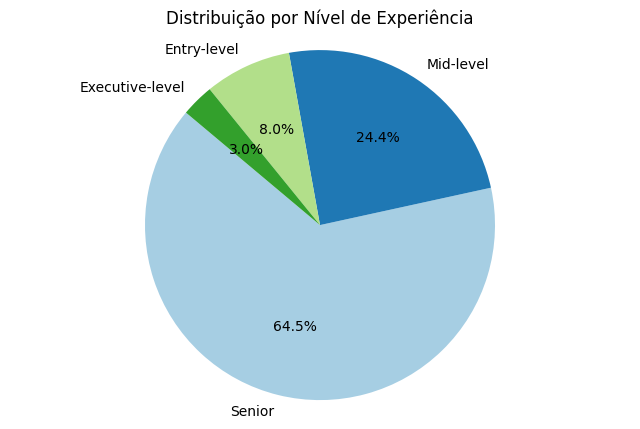

In [21]:
def plot_experience_level(df):
    """Plota a frequência por nível de experiência como um gráfico de pizza."""
    # Calcular a frequência de cada nível de experiência
    experience_freq = df['experience_level'].value_counts()

    # Criar o gráfico de pizza
    plt.figure(figsize=(8, 5))
    plt.pie(experience_freq, labels=experience_freq.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Distribuição por Nível de Experiência')
    plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo
    plt.show()
plot_experience_level(df)

## Gráfico tipo de trabalho

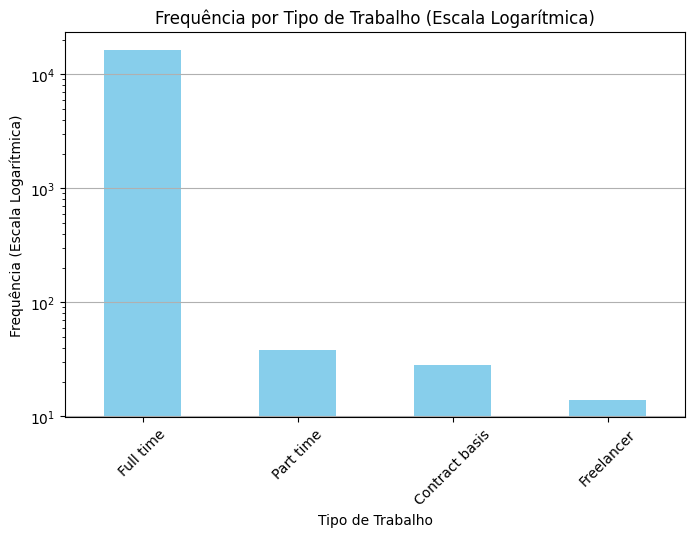

In [22]:
def plot_employment_type(df):
    """Plota a frequência por tipo de trabalho usando gráfico de barras com escala logarítmica."""
    employment_freq = df['employment_type'].value_counts()

    plt.figure(figsize=(8, 5))
    employment_freq.plot(kind='bar', color='skyblue')

    # Usando escala logarítmica para o eixo y
    plt.yscale('log')

    plt.title('Frequência por Tipo de Trabalho (Escala Logarítmica)')
    plt.xlabel('Tipo de Trabalho')
    plt.ylabel('Frequência (Escala Logarítmica)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    plt.show()

# Exemplo de uso
plot_employment_type(df)

## Gráfico salário em USD



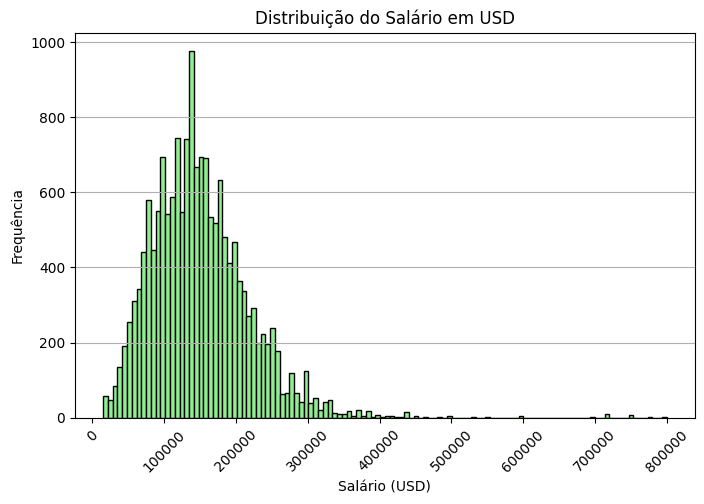

In [23]:

def plot_salary(df):
    """Plota a distribuição do salário em USD como um histograma."""
    plt.figure(figsize=(8, 5))
    # Plotar histograma com ajuste automático de bins
    plt.hist(df['salary_in_usd'], bins='auto', color='lightgreen', edgecolor='black')
    plt.title('Distribuição do Salário em USD')
    plt.xlabel('Salário (USD)')
    plt.ylabel('Frequência')
    plt.grid(axis='y')
    plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário
    plt.show()
plot_salary(df)

## Gráfico porcentagem de trabalho remoto

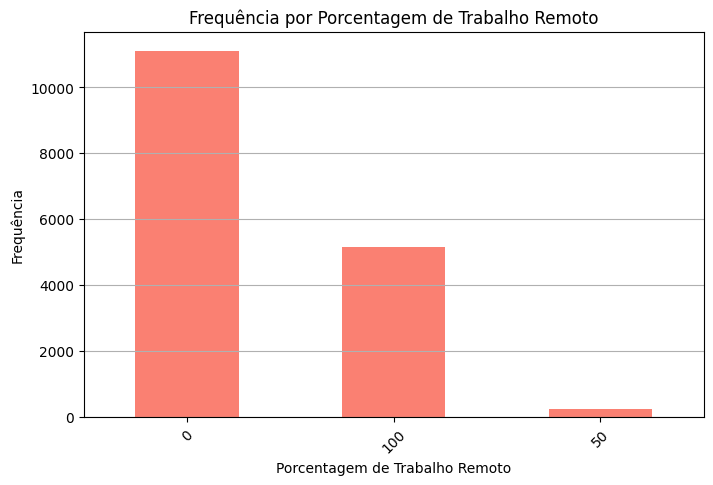

In [24]:

def plot_remote_ratio(df):
    """Plota a frequência por porcentagem de trabalho remoto"""
    remote_freq = df['remote_ratio'].value_counts()
    plt.figure(figsize=(8, 5))
    remote_freq.plot(kind='bar', color='salmon')
    plt.title('Frequência por Porcentagem de Trabalho Remoto')
    plt.xlabel('Porcentagem de Trabalho Remoto')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
plot_remote_ratio(df)

## Gráfico tamanho da empresa

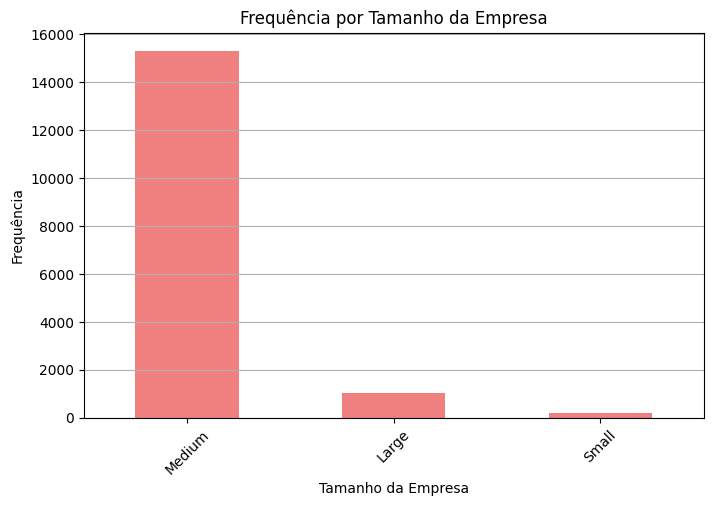

In [25]:
def plot_company_size(df):
    """Plota a frequência por tamanho da empresa"""
    company_size_freq = df['company_size'].value_counts()
    plt.figure(figsize=(8, 5))
    company_size_freq.plot(kind='bar', color='lightcoral')
    plt.title('Frequência por Tamanho da Empresa')
    plt.xlabel('Tamanho da Empresa')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
plot_company_size(df)

Tarefa 4

# **Tarefa 4**

**Análise:**
A análise das medidas descritivas revela uma distribuição de salários bastante ampla. A média salarial de 149.686,78 é superior à mediana de 141.300,00, o que sugere a presença de valores altos que puxam a média para cima. O intervalo entre o mínimo de 15.000,00 e o máximo de 800.000,00 indica uma grande dispersão nos dados.

O desvio padrão de 68,505.29 reforça essa variabilidade, indicando uma dispersão significativa em torno da média. O coeficiente de variação de 45.77% também demonstra alta variabilidade nos salários, sugerindo que os valores estão dispersos de forma heterogênea.

A diferença entre o 1º quartil (Q1) de 101.125,00 e o 3º quartil (Q3) de 185.900,00 mostra que 50% dos salários estão dentro dessa faixa, mas a amplitude e o desvio padrão indicam a presença de valores discrepantes nos extremos, o que deve ser levado em consideração ao interpretar os dados.

Essas informações refletem uma distribuição com salários bastante variados, com uma leve assimetria e forte presença de outliers no topo.

Medidas Descritivas para salary_in_usd:


Medida,Valor
Média,149686.78
Mediana,141300.00
Mínimo,15000.00
Máximo,800000.00
Desvio Padrão,68505.29
Coeficiente de Variação (%),45.77
1º Quartil (Q1),101125.00
3º Quartil (Q3),185900.00


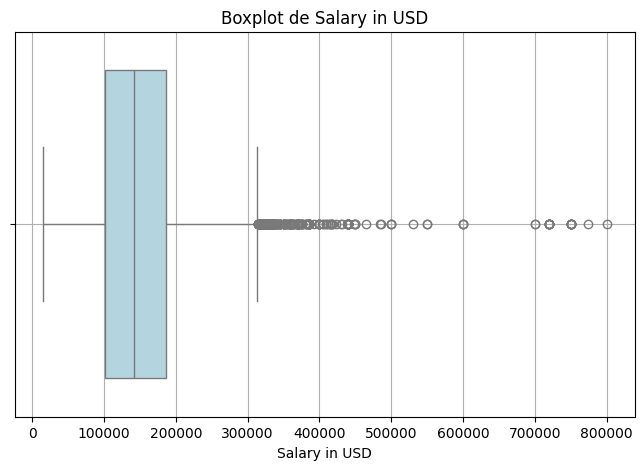

In [26]:
from ctypes import alignment
def plot_salary_statistics(df):
    """Calcula e plota as medidas descritivas para a variável salary_in_usd"""

    # Calculando as medidas descritivas
    media = df['salary_in_usd'].mean()
    mediana = df['salary_in_usd'].median()
    minimo = df['salary_in_usd'].min()
    maximo = df['salary_in_usd'].max()
    desvio_padrao = df['salary_in_usd'].std()
    coeficiente_variacao = desvio_padrao / media * 100
    primeiro_quartil = df['salary_in_usd'].quantile(0.25)
    terceiro_quartil = df['salary_in_usd'].quantile(0.75)

    # Criando um dicionário das medidas descritivas
    medidas_descritivas = {
        'Média': media,
        'Mediana': mediana,
        'Mínimo': minimo,
        'Máximo': maximo,
        'Desvio Padrão': desvio_padrao,
        'Coeficiente de Variação (%)': coeficiente_variacao,
        '1º Quartil (Q1)': primeiro_quartil,
        '3º Quartil (Q3)': terceiro_quartil
    }


    # Criar DataFrame a partir do dicionário de medidas descritivas
    df_medidas = pd.DataFrame(medidas_descritivas.items(), columns=['Medida', 'Valor'])
    df_medidas['Valor'] = df_medidas['Valor'].round(2)

    # Exibir as medidas descritivas
    print("Medidas Descritivas para salary_in_usd:")
    display(HTML(df_medidas.to_html(index=False, border=0)))

    # Criando o boxplot para a variável salary_in_usd
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['salary_in_usd'], color='lightblue')
    plt.title('Boxplot de Salary in USD')
    plt.xlabel('Salary in USD')
    plt.grid(True)
    plt.show()
plot_salary_statistics(df)

# **Tarefa 5**

Tabela de Contingência - Frequências Absolutas:


remote_ratio,0,50,100
,874,80,371
,316,9,176
,2828,96,1113
,7099,64,3507



Tabela de Contingência - Percentual do Total Geral (%):


remote_ratio,0,50,100
,5.29,0.48,2.24
,1.91,0.05,1.06
,17.11,0.58,6.73
,42.94,0.39,21.21


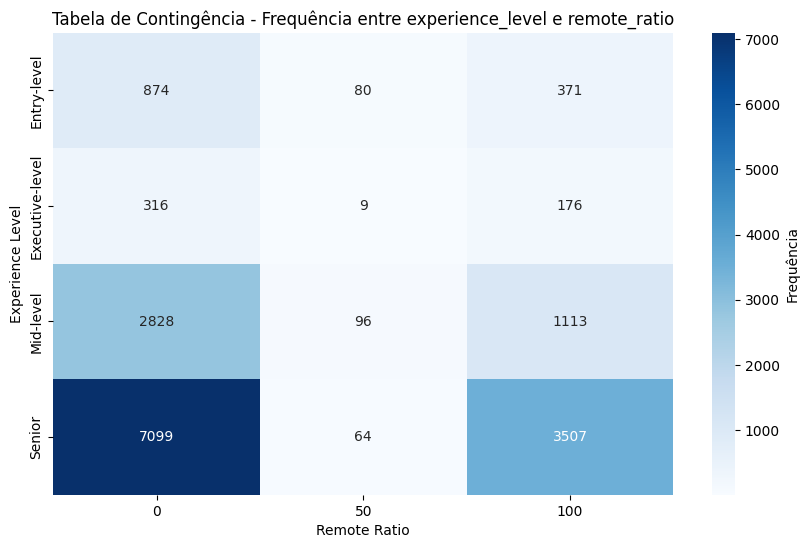

In [27]:
def plot_contingency_table(df):
    """Cria uma tabela de contingência e plota um gráfico de calor para experience_level e remote_ratio"""

    # Criar tabela de contingência (com frequências absolutas)
    contingencia = pd.crosstab(df['experience_level'], df['remote_ratio'])

    # Criar tabela de contingência com percentuais do total geral
    percentual_total = pd.crosstab(df['experience_level'], df['remote_ratio'], normalize='all') * 100

    # Exibir as tabelas
    print("Tabela de Contingência - Frequências Absolutas:")
    display(HTML(contingencia.to_html(index=False, border=0)))
    print("\nTabela de Contingência - Percentual do Total Geral (%):")
    display(HTML(percentual_total.round(2).to_html(index=False, border=0)))

    # Criar gráfico de calor para a tabela de frequências
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingencia, annot=True, cmap='Blues', fmt="d", cbar_kws={'label': 'Frequência'})
    plt.title('Tabela de Contingência - Frequência entre experience_level e remote_ratio')
    plt.ylabel('Experience Level')
    plt.xlabel('Remote Ratio')
    plt.show()
plot_contingency_table(df)

# **Tarefa 6**

Tabela de Contingência - Frequências Absolutas:


company_size,Large,Medium,Small
,7,12,9
,1,6,7
,1022,15266,166
,10,22,6



Tabela de Contingência - Percentual do Total Geral (%):


company_size,Large,Medium,Small
,0.04,0.07,0.05
,0.01,0.04,0.04
,6.18,92.33,1.00
,0.06,0.13,0.04


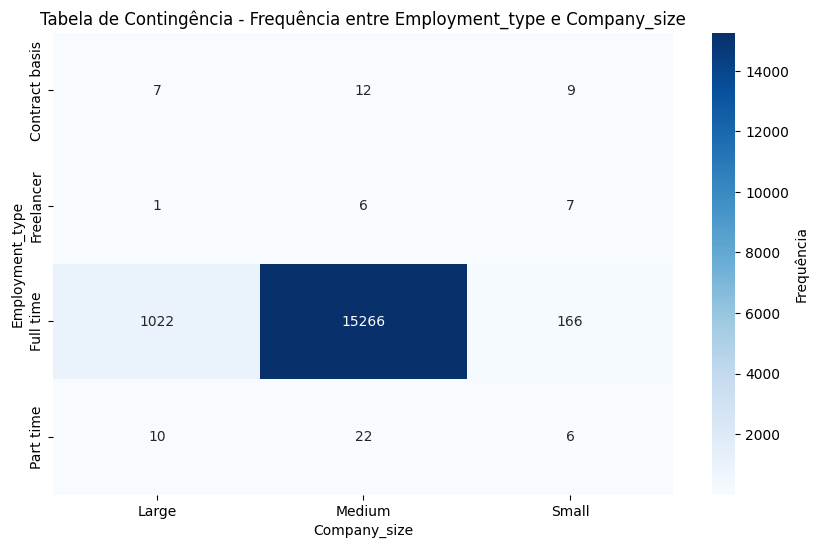

In [28]:
def plot_contingency_table2(df):
    """Cria uma tabela de contingência e plota um gráfico de calor para Employment_type e company_size."""

    # Criar tabela de contingência (com frequências absolutas)
    contingencia = pd.crosstab(df['employment_type'], df['company_size'])

    # Criar tabela de contingência com percentuais do total geral
    percentual_total = pd.crosstab(df['employment_type'], df['company_size'], normalize='all') * 100

    # Exibir as tabelas
    print("Tabela de Contingência - Frequências Absolutas:")
    display(HTML(contingencia.to_html(index=False, border=0)))
    print("\nTabela de Contingência - Percentual do Total Geral (%):")
    display(HTML(percentual_total.round(2).to_html(index=False, border=0)))

    # Criar gráfico de calor para a tabela de frequências
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingencia, annot=True, cmap='Blues', fmt='d', cbar_kws={'label': 'Frequência'})
    plt.title('Tabela de Contingência - Frequência entre Employment_type e Company_size')
    plt.ylabel('Employment_type')
    plt.xlabel('Company_size')
    plt.show()

# Chamando a função para gerar as tabelas e o gráfico
plot_contingency_table2(df)

# **Tarefa 7**

**Análise:**
A análise das medidas descritivas para a variável salary_in_usd, estratificada pela variável experience_level, revela algumas tendências interessantes. Os dados mostram que os profissionais com níveis de experiência mais altos tendem a ter salários médios significativamente superiores. A mediana também confirma essa tendência, com as medianas aumentando à medida que o nível de experiência sobe. Além disso, a variabilidade dos salários, medida pelo desvio padrão, é mais alta em níveis de experiência avançada, indicando que os salários variam mais dentro desse grupo. A presença de valores discrepantes é observada, especialmente em níveis de experiência sêniores, onde alguns salários estão bem acima da maioria. O coeficiente de variação, que quantifica a variabilidade relativa, também indica maior dispersão entre os salários em níveis de experiência mais altos, sugerindo uma homogeneidade menor nesse grupo.

Medidas Descritivas para salary_in_usd estratificadas por experience_level:


experience_level,média,mediana,mínimo,máximo,desvio_padrao,coeficiente_variacao,primeiro_quartil,terceiro_quartil
Entry-level,92327.41,83000.0,15000,774000,51838.62,56.15,58000.0,116000.0
Executive-level,195264.28,192000.0,15000,465000,70398.70,36.05,145000.0,236000.0
Mid-level,125855.24,115000.0,15000,800000,66937.01,53.19,80976.0,155000.0
Senior,163662.83,155000.0,15809,750000,63948.40,39.07,120000.0,200000.0


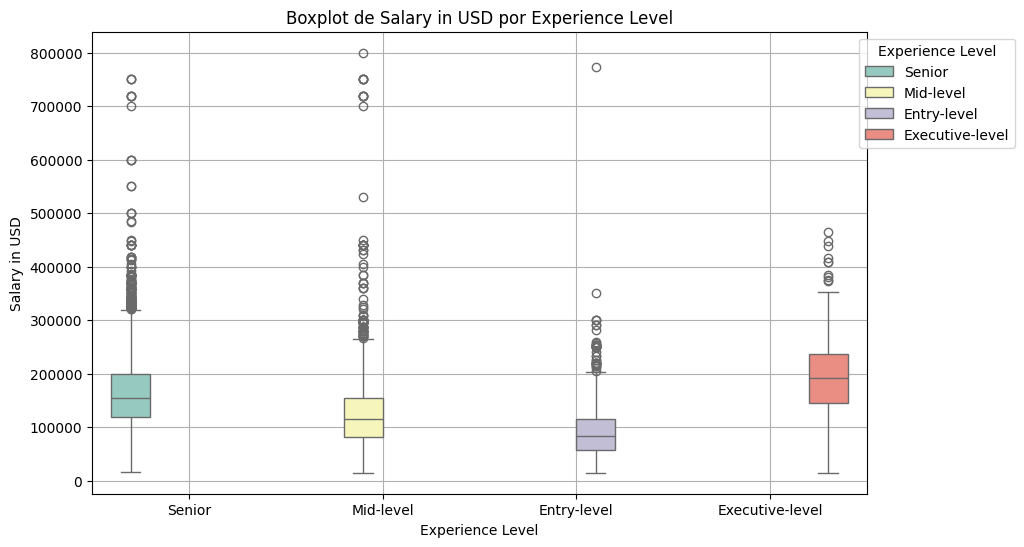

In [29]:
def plot_salary_statistics_by_experience(df):
    """Calcula e plota as medidas descritivas para a variável salary_in_usd estratificadas por experience_level."""

    # Calculando as medidas descritivas estratificadas
    medidas_descritivas = df.groupby('experience_level')['salary_in_usd'].agg(
        média='mean',
        mediana='median',
        mínimo='min',
        máximo='max',
        desvio_padrao='std',
        coeficiente_variacao=lambda x: (x.std() / x.mean() * 100),
        primeiro_quartil=lambda x: x.quantile(0.25),
        terceiro_quartil=lambda x: x.quantile(0.75)
    ).reset_index()

    # Arredondando os valores
    medidas_descritivas = medidas_descritivas.round(2)

    # Exibir as medidas descritivas
    print("Medidas Descritivas para salary_in_usd estratificadas por experience_level:")
    display(HTML(medidas_descritivas.to_html(index=False, border=0)))

    # Criando o boxplot estratificado
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='experience_level', y='salary_in_usd', data=df, hue='experience_level', palette='Set3', dodge=True)
    plt.title('Boxplot de Salary in USD por Experience Level')
    plt.ylabel('Salary in USD')
    plt.xlabel('Experience Level')
    plt.grid(True)
    plt.legend(title='Experience Level', loc='upper right', bbox_to_anchor=(1.2, 1))  # Ajuste da legenda
    plt.show()

# Chamando a função para gerar as medidas descritivas e o gráfico
plot_salary_statistics_by_experience(df)

# **Tarefa 8**

**Análise:**
A análise das medidas descritivas para a variável salary_in_usd, estratificada por employment_type, revela diferenças significativas nas remunerações entre os diferentes tipos de contrato. O emprego em tempo integral apresenta a maior média salarial (149987.69 USD) e uma mediana correspondente (141525.0 USD), indicando que este tipo de emprego tende a oferecer os melhores salários. Em contraste, os freelancers têm a média salarial mais baixa (49220.86 USD) e uma mediana próxima (47777.5 USD), refletindo uma distribuição de salários que é mais afetada por variações e menos consistente. O desvio padrão é mais alto para os trabalhadores em contrato (91675.96 USD), sugerindo uma maior variabilidade nos salários, enquanto os trabalhadores em tempo integral apresentam uma menor dispersão. A presença de valores discrepantes é notável, especialmente para os freelancers e contratados, onde alguns casos estão bem acima do intervalo interquartil, indicando que, embora a maioria receba salários mais baixos, há exceções que elevam a média. O coeficiente de variação também sugere uma maior homogeneidade nas remunerações para empregos em tempo integral em comparação com os outros tipos de emprego.



Medidas Descritivas para salary_in_usd estratificadas por Employment_type:


employment_type,média,mediana,mínimo,máximo,desvio_padrao,coeficiente_variacao,primeiro_quartil,terceiro_quartil
Contract basis,112578.39,93856.0,25500,416000,91675.96,81.43,50000.00,121901.75
Freelancer,49220.86,47777.5,20000,100000,24997.26,50.79,31892.25,57500.00
Full time,149987.69,141525.0,15000,800000,68351.02,45.57,102225.00,185900.00
Part time,83750.16,66451.5,15966,291340,61774.45,73.76,35028.50,121157.75


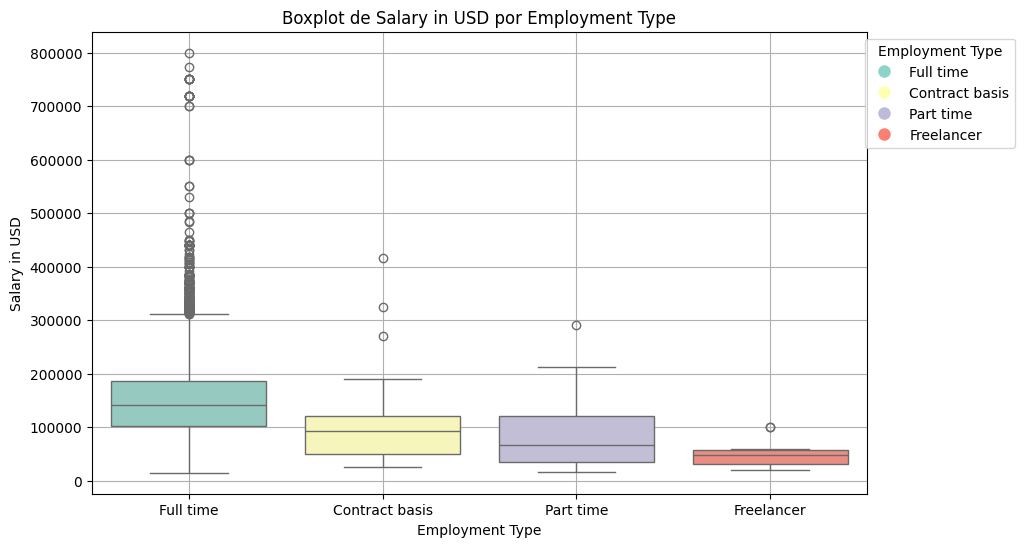

In [30]:
def plot_salary_statistics_by_employment(df):
    """Calcula e plota as medidas descritivas para a variável salary_in_usd estratificadas por Employment_type."""

    # Calculando as medidas descritivas estratificadas
    medidas_descritivas = df.groupby('employment_type')['salary_in_usd'].agg(
        média='mean',
        mediana='median',
        mínimo='min',
        máximo='max',
        desvio_padrao='std',
        coeficiente_variacao=lambda x: (x.std() / x.mean() * 100),
        primeiro_quartil=lambda x: x.quantile(0.25),
        terceiro_quartil=lambda x: x.quantile(0.75)
    ).reset_index()

    # Arredondando os valores
    medidas_descritivas = medidas_descritivas.round(2)

    # Exibir as medidas descritivas
    print("Medidas Descritivas para salary_in_usd estratificadas por Employment_type:")
    display(HTML(medidas_descritivas.to_html(index=False, border=0)))

    # Criando o boxplot estratificado
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='employment_type', y='salary_in_usd', data=df, hue='employment_type', palette='Set3', dodge=False)
    plt.title('Boxplot de Salary in USD por Employment Type')
    plt.ylabel('Salary in USD')
    plt.xlabel('Employment Type')
    plt.grid(True)

    # Adicionando a legenda manualmente
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in sns.color_palette('Set3', len(df['employment_type'].unique()))]
    plt.legend(handles, df['employment_type'].unique(), title='Employment Type', loc='upper right', bbox_to_anchor=(1.2, 1))

    plt.show()

# Chamando a função para gerar as medidas descritivas e o gráfico
plot_salary_statistics_by_employment(df)


# **Tarefa 9**

**Discussão:**
Um gráfico de linhas seria ideal para representarmos a evolução dos salários ao longo do tempo caso houvesse dados de diferentes anos. Entretanto, para este conjunto de dados, poderíamos usar um gráfico de linhas para visualizar como os salários variam com base em um fator contínuo, como o nível de experiência. Abaixo segue um exemplo do Salário Médio por Nível de Experiência:

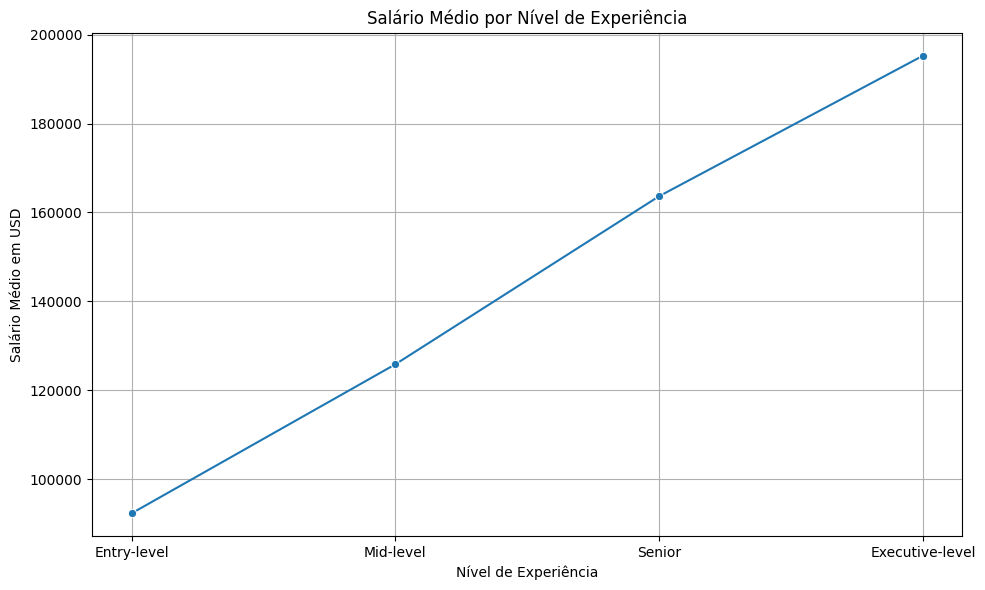

In [31]:
def plot_line_graph_salary_by_experience(df):
    """Gráfico de linhas da média Salarial em Dólar por Nível de Experiência"""
    
    # Agrupar por experience_level e então calcular a média de salary_in_usd para cada nível de experiência
    salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

    # Ordenar os valores por nível de experiência para deixar o gráfico mais limpo
    salary_by_experience = salary_by_experience.sort_values(by='salary_in_usd')

    # Plotting dos dados com o X = Nível de Experiência, Y = Salário em Dólar
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=salary_by_experience, x='experience_level', y='salary_in_usd', marker='o')

    plt.title('Salário Médio por Nível de Experiência')
    plt.xlabel('Nível de Experiência')
    plt.ylabel('Salário Médio em USD')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_line_graph_salary_by_experience(df)
    